In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [2]:
train_data = pd.read_csv('5Friday-02-03-2018_TrafficForML_CICFlowMeter_5Percent_training.csv')
test_data = pd.read_csv('2Friday-02-03-2018_TrafficForML_CICFlowMeter_2Percent_test.csv')



In [3]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)



Dimensions of the Training set: (52301, 83)
Dimensions of the Testing set: (19875, 83)


In [4]:
train_data.head(5)

,Unnamed: 0,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_0,Protocol_6,Protocol_17
0,952709,443,02/03/2018 11:31:48,839,3,0,77,0.0,46,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,1002719,3389,02/03/2018 10:27:11,2980332,9,8,1825,1581.0,677,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,883296,61145,02/03/2018 09:59:25,166,2,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
3,1033681,3389,02/03/2018 01:00:58,2255075,12,7,1148,1581.0,677,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
4,763235,53,02/03/2018 02:15:44,274,1,1,32,48.0,32,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [5]:
train_data.pop("Unnamed: 0")
test_data.pop("Unnamed: 0")

0        437718
1        761581
2        622069
3        465398
4        764254
          ...  
19870    196074
19871    319740
19872    296147
19873    204314
19874      9643
Name: Unnamed: 0, Length: 19875, dtype: int64

In [6]:
train_data.pop("Timestamp")
test_data.pop("Timestamp")

0        02/03/2018 11:05:30
1        02/03/2018 11:06:38
2        02/03/2018 09:00:23
3        02/03/2018 08:59:56
4        02/03/2018 01:37:25
                ...         
19870    02/03/2018 11:20:20
19871    02/03/2018 12:46:28
19872    02/03/2018 03:46:50
19873    02/03/2018 12:54:03
19874    02/03/2018 11:26:35
Name: Timestamp, Length: 19875, dtype: object

In [7]:
train_data = train_data[np.isfinite(train_data).all(1)]
test_data = test_data[np.isfinite(test_data).all(1)]

In [8]:
print('Label distribution Training set:')
print(train_data['Label'].value_counts())
print()
print('Label distribution Test set:')
print(test_data['Label'].value_counts())

Label distribution Training set:
0    37919
1    14310
Name: Label, dtype: int64

Label distribution Test set:
0    14417
1     5438
Name: Label, dtype: int64


In [9]:
print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Testing set:',test_data.shape)

Dimensions of the Training set: (52229, 81)
Dimensions of the Testing set: (19855, 81)


In [10]:
to_drop_Benign = [0,0]
to_drop_Infilteration = [0,1]

Benign_df=train_data[train_data['Label'].isin(to_drop_Benign)];
Infilteration_df=train_data[train_data['Label'].isin(to_drop_Infilteration)];

#test
Benign_df_test=test_data[test_data['Label'].isin(to_drop_Benign)];
Infilteration_df_test=test_data[test_data['Label'].isin(to_drop_Infilteration)];

print('Train:')
print('Dimensions of Benign:' ,Benign_df.shape)
print('Dimensions of Infilteration:' ,Infilteration_df.shape)
print()
print('Test:')
print('Dimensions of Begin:' ,Benign_df_test.shape)
print('Dimensions of Infilteration:' ,Infilteration_df_test.shape)

Train:
Dimensions of Benign: (37919, 81)
Dimensions of Infilteration: (52229, 81)

Test:
Dimensions of Begin: (14417, 81)
Dimensions of Infilteration: (19855, 81)


In [11]:
#Split dataframes into X & Y
# X Properties, Y result variables

X_Benign = Benign_df.drop('Label',1)
Y_Benign = Benign_df.Label

X_Infilteration = Infilteration_df.drop('Label',1)
Y_Infilteration = Infilteration_df.Label


#test
X_Benign_test = Benign_df_test.drop('Label',1)
Y_Benign_test = Benign_df_test.Label

X_Infilteration_test = Infilteration_df_test.drop('Label',1)
Y_Infilteration_test = Infilteration_df_test.Label


In [12]:
from sklearn import preprocessing

scaler2 = preprocessing.StandardScaler().fit(X_Infilteration)
X_Infilteration=scaler2.transform(X_Infilteration)


# test data

scaler4 = preprocessing.StandardScaler().fit(X_Infilteration_test)
X_Infilteration_test=scaler4.transform(X_Infilteration_test)

# SVM

In [13]:
import time

In [14]:
from sklearn.svm import SVC

#clf_SVM_Benign=SVC(kernel='linear', C=1.0, random_state=0)
clf_SVM_Infilteration=SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()


#clf_SVM_Benign.fit(X_Benign, Y_Benign.astype(int))
clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0


In [15]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,14306,111
1,7,5431


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.98706 (+/- 0.00488)
Precision: 0.95541 (+/- 0.01585)
Recall: 0.99945 (+/- 0.00169)
F-measure: 0.97692 (+/- 0.00852)
train_time:27.736s

test_time:3.430s



In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9955067590483764
Threshold: %f [2 1 0]
FPR: %f [0.         0.00769924 1.        ]
TPR: %f [0.         0.99871276 1.        ]


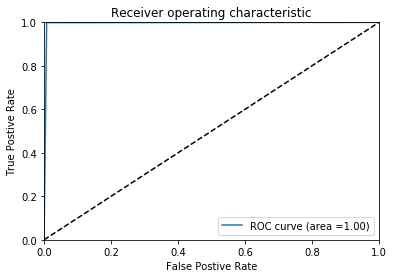

In [18]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [19]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='rbf', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [20]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,14381,36
1,11,5427


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.97844 (+/- 0.01330)
Precision: 0.92953 (+/- 0.04131)
Recall: 0.99743 (+/- 0.00410)
F-measure: 0.96217 (+/- 0.02264)
train_time:24.671s

test_time:8.352s



In [22]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9977400727038997
Threshold: %f [2 1 0]
FPR: %f [0.         0.00249705 1.        ]
TPR: %f [0.        0.9979772 1.       ]


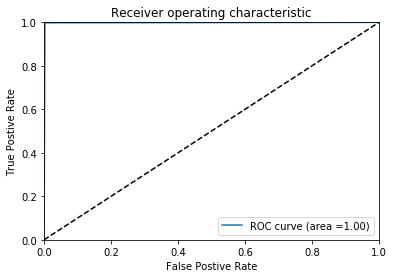

In [23]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [24]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='poly', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [25]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,13627,790
1,2,5436


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.96026 (+/- 0.01012)
Precision: 0.87364 (+/- 0.02837)
Recall: 0.99982 (+/- 0.00110)
F-measure: 0.93242 (+/- 0.01607)
train_time:33.711s

test_time:11.061s



In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9724178984175514
Threshold: %f [2 1 0]
FPR: %f [0.         0.05479642 1.        ]
TPR: %f [0.         0.99963222 1.        ]


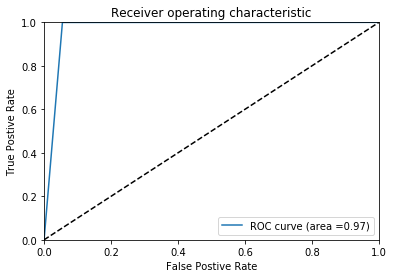

In [28]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()

In [29]:
from sklearn.svm import SVC

clf_SVM_Infilteration=SVC(kernel='sigmoid', C=1.0, random_state=0)
train0 = time.time()

clf_SVM_Infilteration.fit(X_Infilteration, Y_Infilteration.astype(int))
train1 = time.time() - train0

In [30]:
test0 = time.time()
Y_Infilteration_pred=clf_SVM_Infilteration.predict(X_Infilteration_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Infilteration_test, Y_Infilteration_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,13662,755
1,17,5421


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Infilteration, X_Infilteration_test, Y_Infilteration_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95598 (+/- 0.01378)
Precision: 0.86970 (+/- 0.03112)
Recall: 0.98749 (+/- 0.02212)
F-measure: 0.92479 (+/- 0.02297)
train_time:68.022s

test_time:13.509s



In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Infilteration_test, Y_Infilteration_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.9722525596607924
Threshold: %f [2 1 0]
FPR: %f [0.         0.05236873 1.        ]
TPR: %f [0.         0.99687385 1.        ]


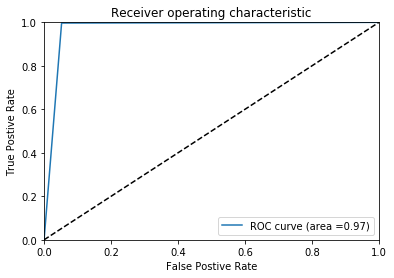

In [33]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.show()